In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df_new = df.copy()

In [7]:
df_new.drop("car_ID",axis=1,inplace=True)

In [8]:
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
df_new[["enginetype","fuelsystem","cylindernumber"]]

,enginetype,fuelsystem,cylindernumber
0,dohc,mpfi,four
1,dohc,mpfi,four
2,ohcv,mpfi,six
3,ohc,mpfi,four
4,ohc,mpfi,five
...,...,...,...
200,ohc,mpfi,four
201,ohc,mpfi,four
202,ohcv,mpfi,six
203,ohc,idi,six


In [18]:
df_new["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [19]:
df_new["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [21]:
df_new["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
df_new["cylindernumber"] = df_new["cylindernumber"].replace("four",4)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("six",6)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("five",5)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("three",3)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("two",2)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("eight",8)
df_new["cylindernumber"] = df_new["cylindernumber"].replace("twelve",12)

In [24]:
df_new["cylindernumber"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [25]:
df_new["cylindernumber"] = df_new["cylindernumber"].astype(int)

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int32  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [28]:
df_new.drop("CarName",axis=1,inplace=True)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [33]:
df_new[df_new.columns[1:7]]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation
0,gas,std,two,convertible,rwd,front
1,gas,std,two,convertible,rwd,front
2,gas,std,two,hatchback,rwd,front
3,gas,std,four,sedan,fwd,front
4,gas,std,four,sedan,4wd,front
...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front
201,gas,turbo,four,sedan,rwd,front
202,gas,std,four,sedan,rwd,front
203,diesel,turbo,four,sedan,rwd,front


In [35]:
df_new["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [36]:
df_new["doornumber"] = df_new["doornumber"].replace("two",2)
df_new["doornumber"] = df_new["doornumber"].replace("four",4)
df_new["doornumber"] = df_new["doornumber"].astype(int)

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [41]:
label = LabelEncoder()
columns = ["fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem"]
for i in columns:
    df_new[i] = label.fit_transform(df_new[i])

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

<Axes: >

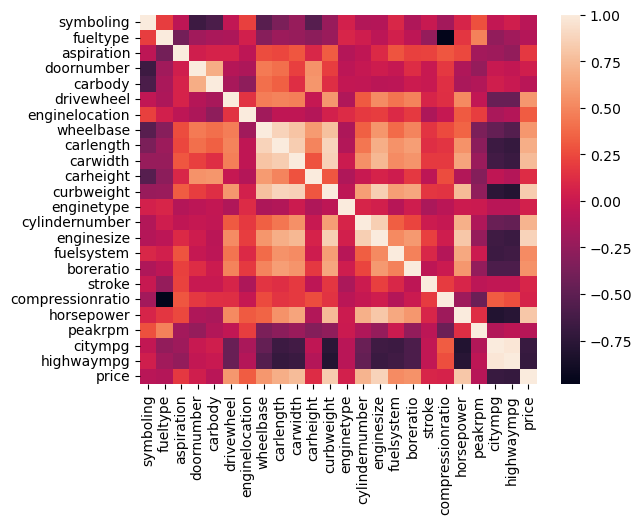

In [45]:
sns.heatmap(df_new.corr())

In [50]:
X= df_new.drop("price",axis=1)
y= df_new["price"]

G:\anakonda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


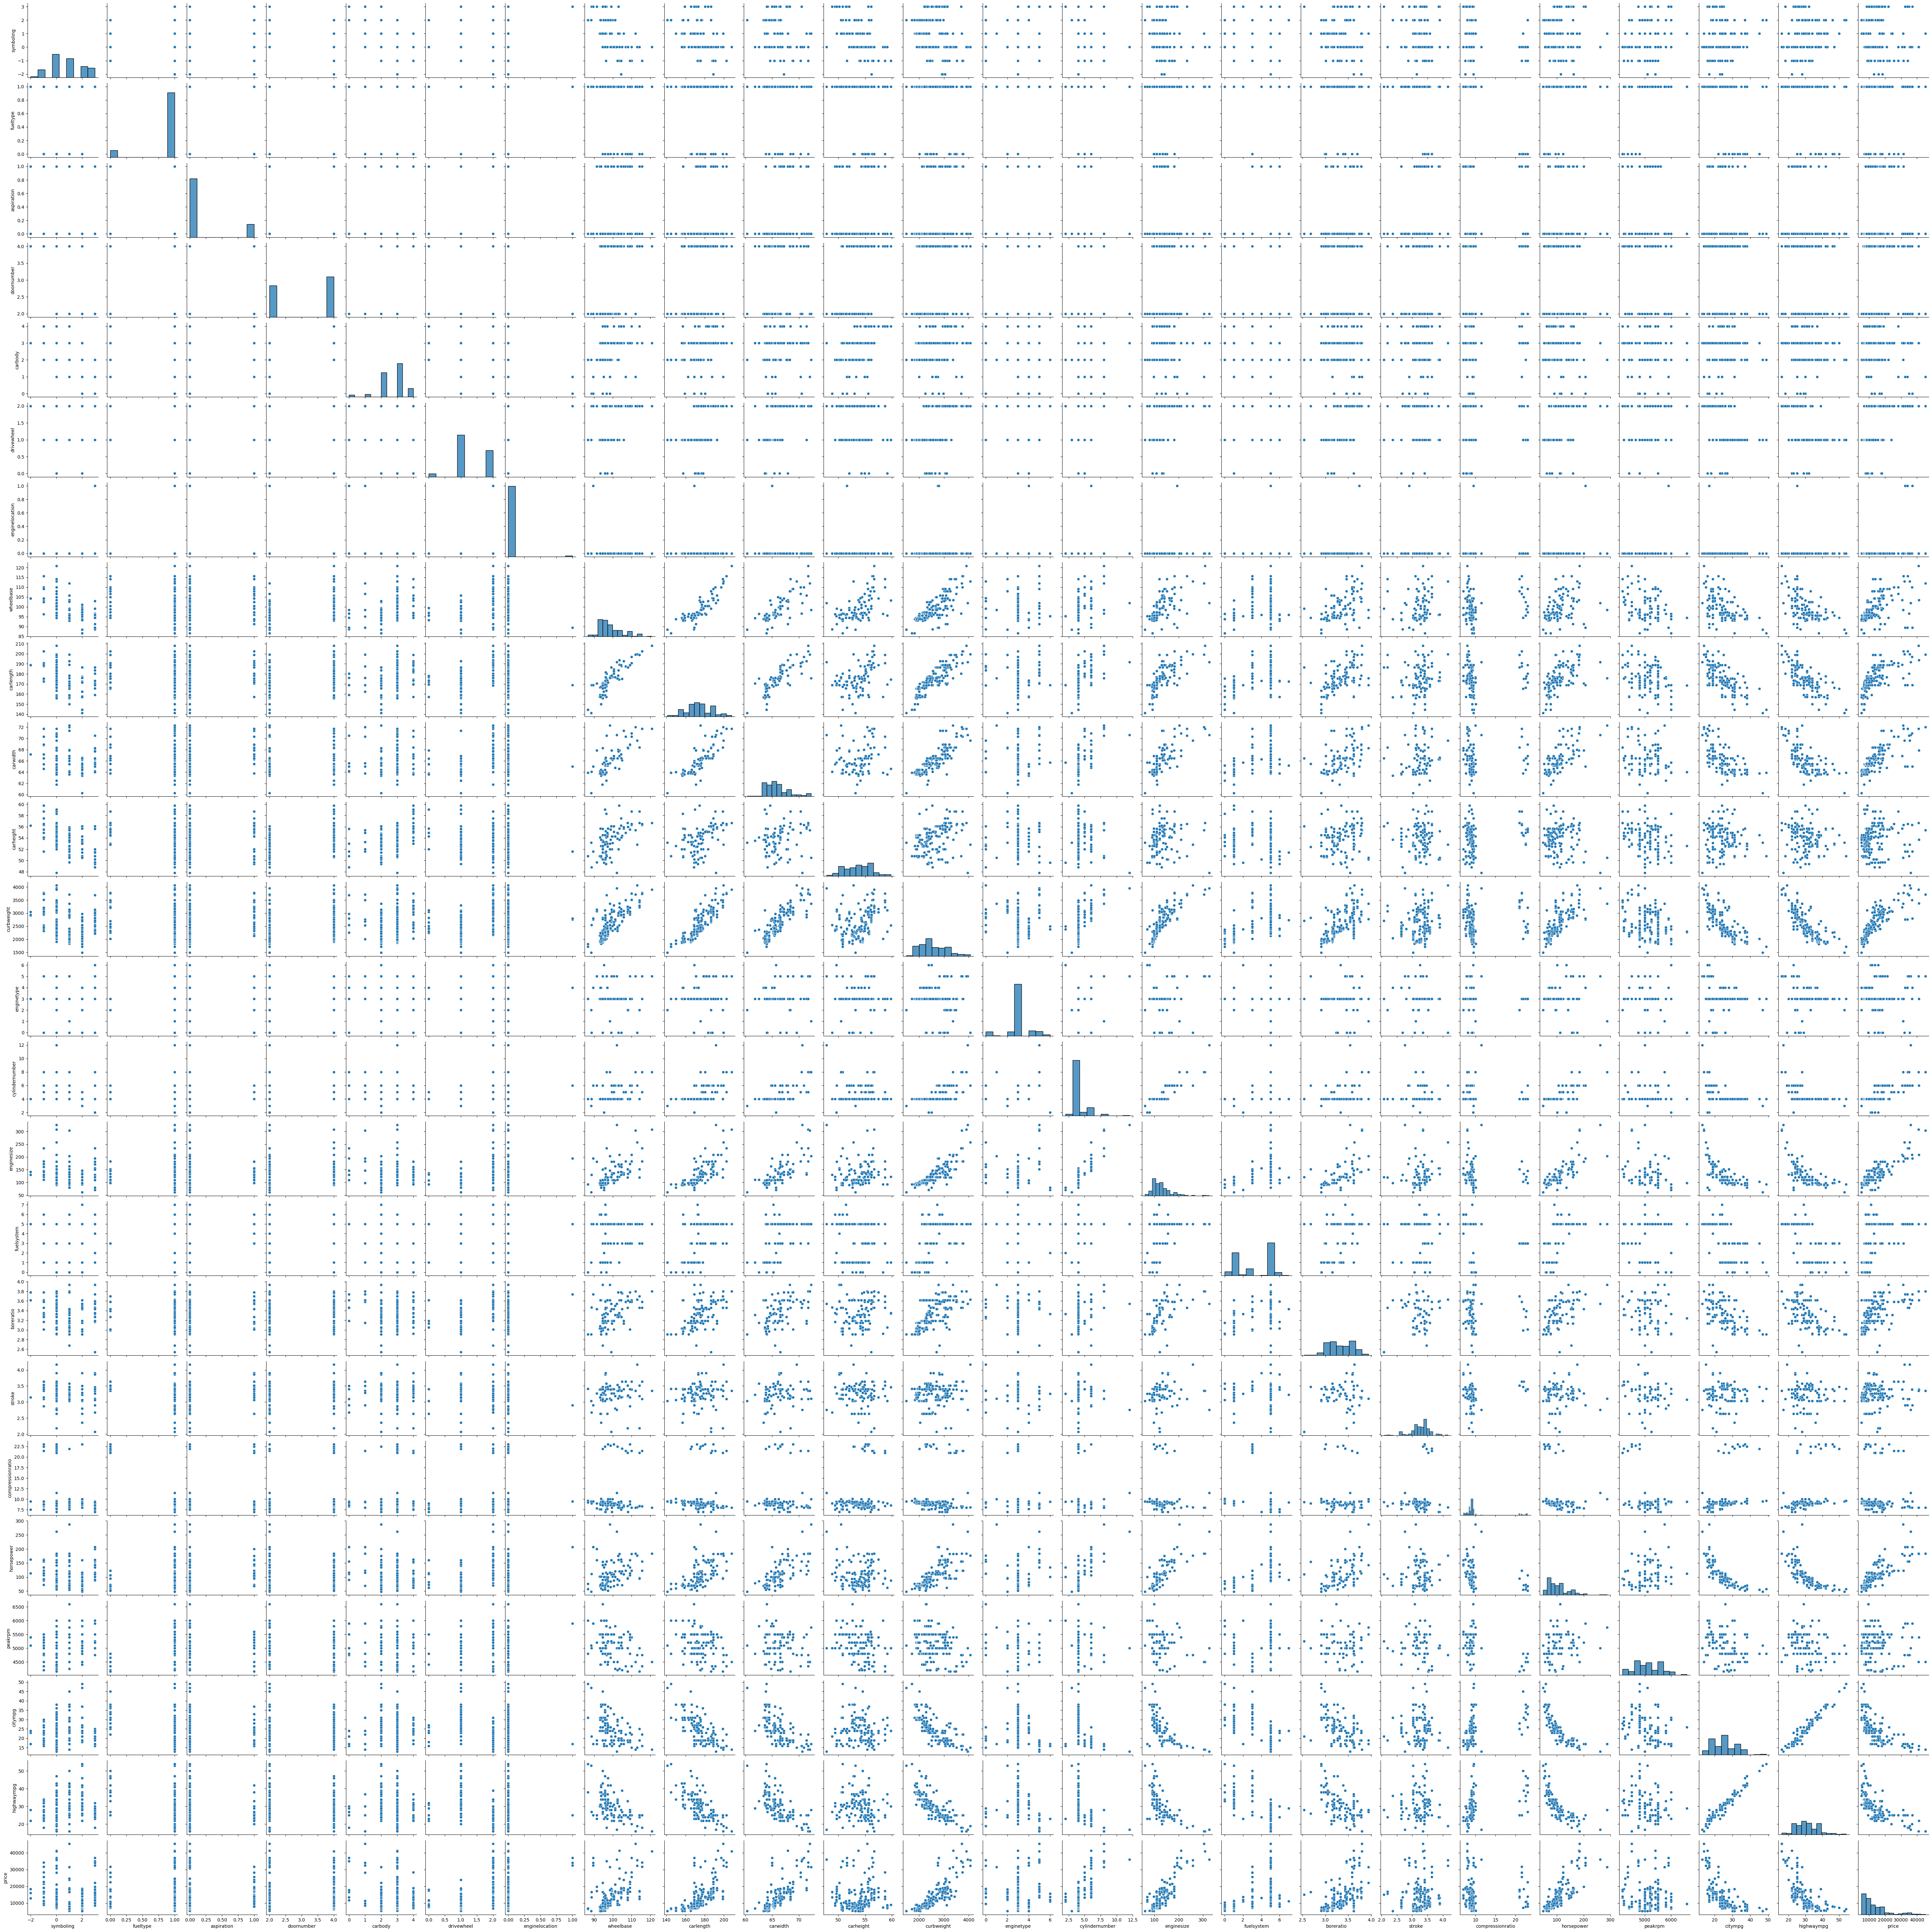

In [51]:
sns.pairplot(df_new)

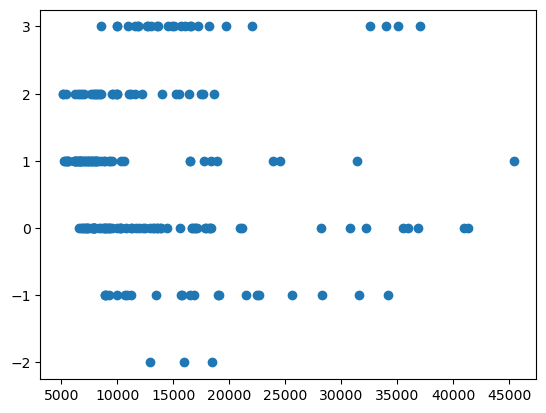

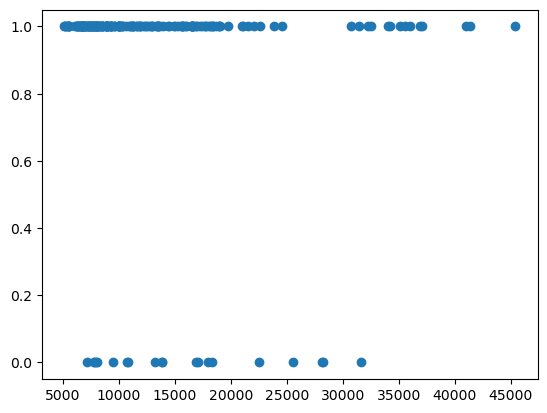

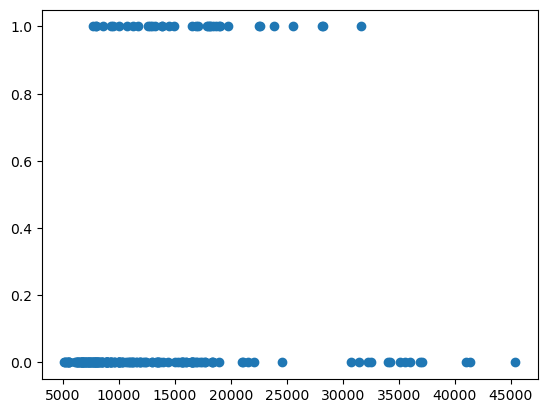

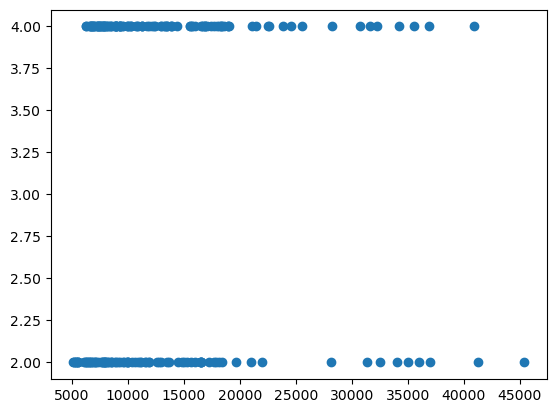

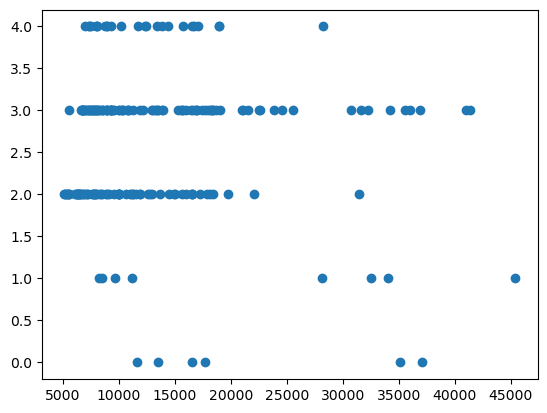

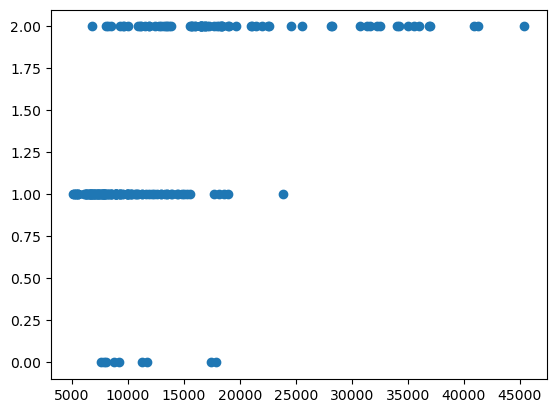

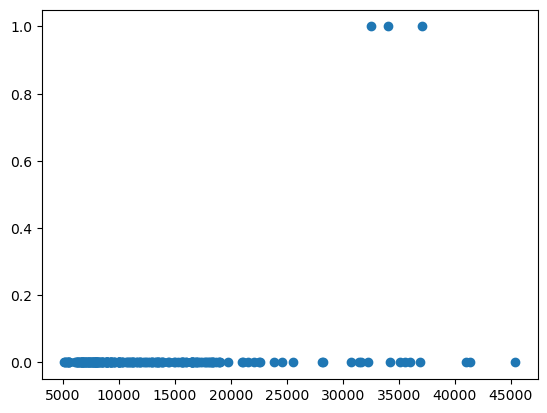

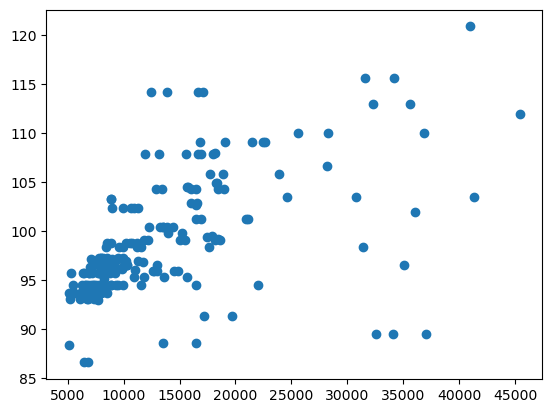

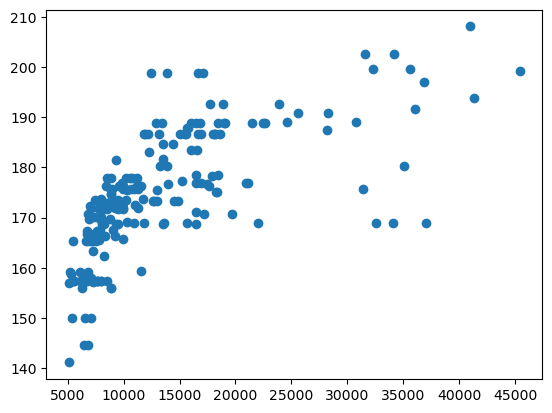

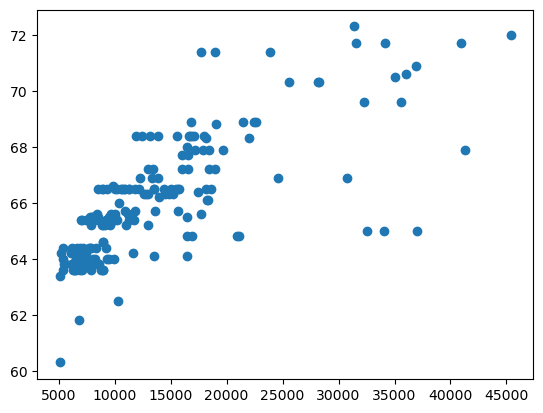

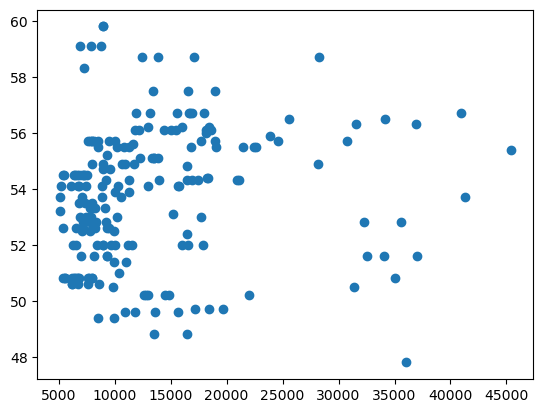

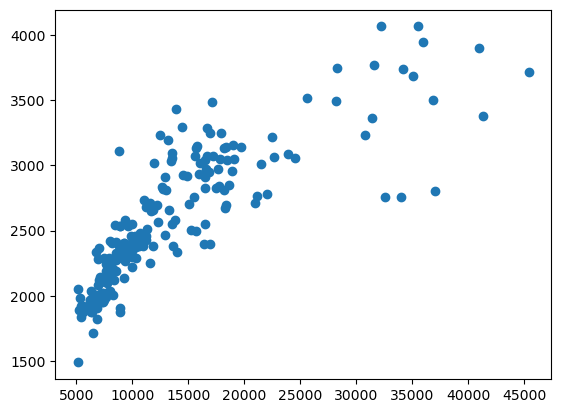

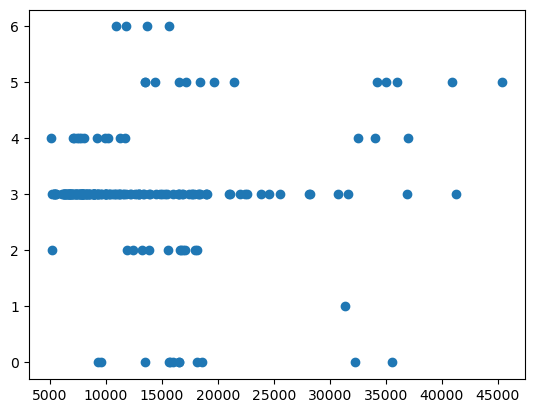

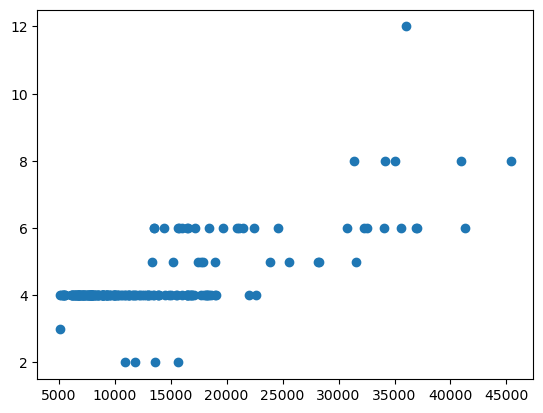

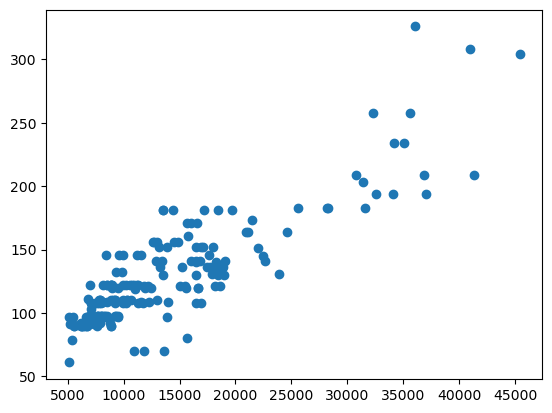

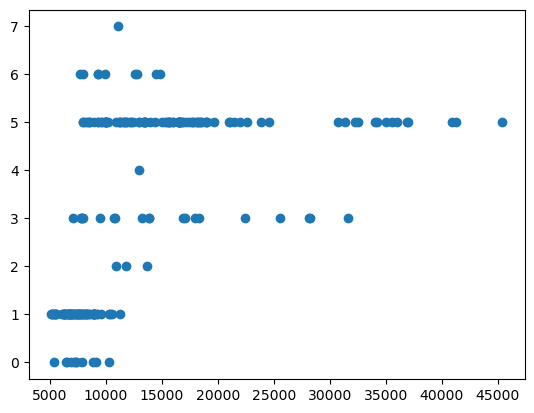

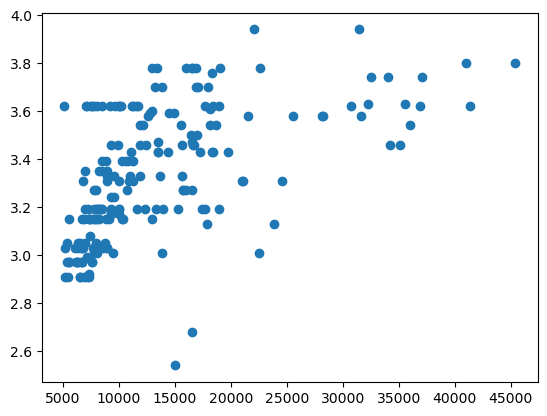

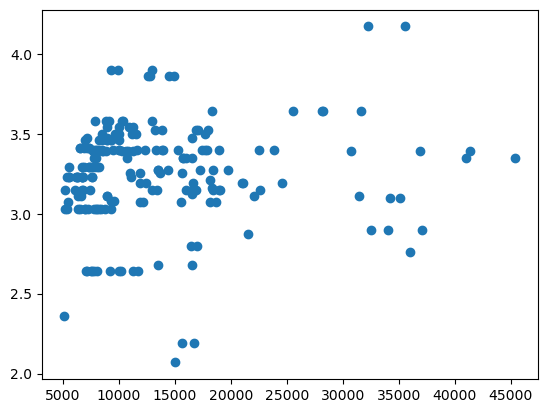

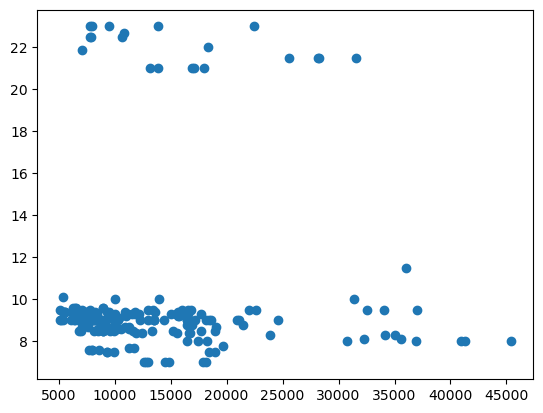

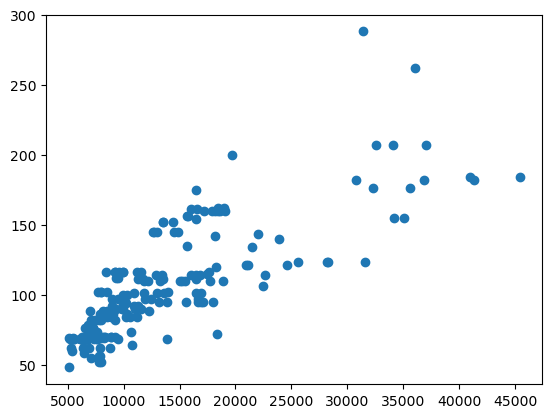

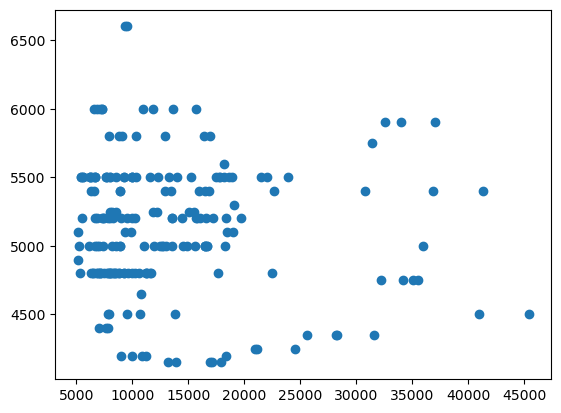

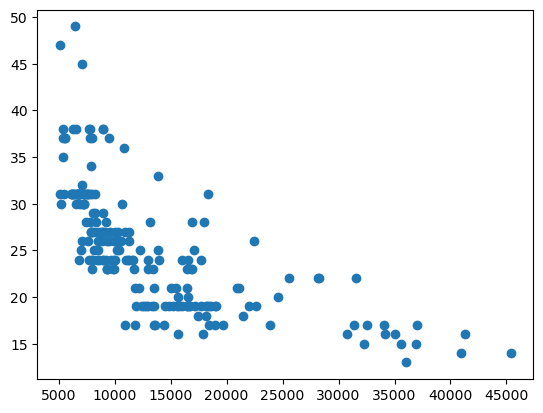

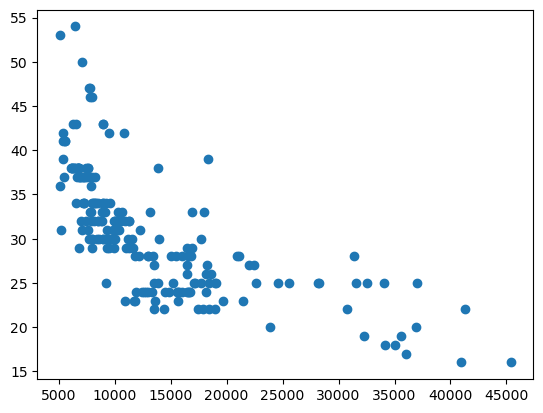

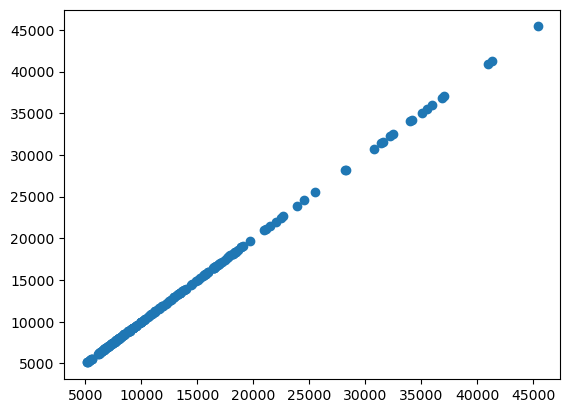

In [55]:
for i in df_new.columns:
    plt.scatter(df_new["price"],df_new[i])
    plt.show()

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [57]:
scale  = StandardScaler()
X_train_scl  = scale.fit_transform(X_train)
X_test_scl  = scale.transform(X_test)

In [58]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
ridgecv = RidgeCV(cv=5)
lassocv = LassoCV(cv=5)
elasticcv = ElasticNetCV(cv=5)

In [67]:
linear.fit(X_train_scl,y_train)

LinearRegression()

In [94]:
r2scored = {}
maed = {}
msed = {}
rmsed = {}

In [95]:
y_pred = linear.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["linear"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["linear"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["linear"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["linear"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8556008175615691
mae: 2280.1762881963714
mse: 10067130.149733271
rmse: 101347109451668.64


In [96]:
ridge.fit(X_train_scl,y_train)
y_pred = ridge.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["ridge"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["ridge"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["ridge"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["ridge"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8859609988886894
mae: 2083.66575931609
mse: 7950498.381960344
rmse: 63210424521554.04


In [97]:
lasso.fit(X_train_scl,y_train)
y_pred = lasso.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["lasso"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["lasso"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["lasso"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["lasso"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8577934744076757
mae: 2263.3280364057837
mse: 9914263.89751006
rmse: 98292628629471.34


In [98]:
elastic.fit(X_train_scl,y_train)
y_pred = elastic.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["elastic"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["elastic"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["elastic"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["elastic"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8827429956251575
mae: 1925.047400527656
mse: 8174849.0820763605
rmse: 66828157514724.71


In [99]:
ridgecv.fit(X_train_scl,y_train)
y_pred = ridgecv.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["ridgecv"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["ridgecv"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["ridgecv"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["ridgecv"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8859609988886894
mae: 2083.66575931609
mse: 7950498.381960344
rmse: 63210424521554.04


In [100]:
lassocv.fit(X_train_scl,y_train)
y_pred = lassocv.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["lassocv"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["lassocv"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["lassocv"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["lassocv"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.9046106989514767
mae: 1798.1354894191475
mse: 6650290.4817832
rmse: 44226363492096.23


In [101]:
elasticcv.fit(X_train_scl,y_train)
y_pred = elastic.predict(X_test_scl)
r2score = r2_score(y_test,y_pred)
r2scored["elasticcv"]= r2score
mae = mean_absolute_error(y_test,y_pred)
maed["elasticcv"]= mae
mse = mean_squared_error(y_test,y_pred)
msed["elasticcv"]= mse
rmse = mean_squared_error(y_test,y_pred)**2
rmsed["elasticcv"]= rmse
print("r2:",r2score)
print("mae:",mae)
print("mse:",mse)
print("rmse:",rmse)

r2: 0.8827429956251575
mae: 1925.047400527656
mse: 8174849.0820763605
rmse: 66828157514724.71


In [102]:
r2scored

{'linear': 0.8556008175615691,
 'ridge': 0.8859609988886894,
 'lasso': 0.8577934744076757,
 'elastic': 0.8827429956251575,
 'ridgecv': 0.8859609988886894,
 'lassocv': 0.9046106989514767,
 'elasticcv': 0.8827429956251575}

In [103]:
maed

{'linear': 2280.1762881963714,
 'ridge': 2083.66575931609,
 'lasso': 2263.3280364057837,
 'elastic': 1925.047400527656,
 'ridgecv': 2083.66575931609,
 'lassocv': 1798.1354894191475,
 'elasticcv': 1925.047400527656}

In [104]:
msed

{'linear': 10067130.149733271,
 'ridge': 7950498.381960344,
 'lasso': 9914263.89751006,
 'elastic': 8174849.0820763605,
 'ridgecv': 7950498.381960344,
 'lassocv': 6650290.4817832,
 'elasticcv': 8174849.0820763605}

In [105]:
rmsed

{'linear': 101347109451668.64,
 'ridge': 63210424521554.04,
 'lasso': 98292628629471.34,
 'elastic': 66828157514724.71,
 'ridgecv': 63210424521554.04,
 'lassocv': 44226363492096.23,
 'elasticcv': 66828157514724.71}

In [106]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree)
    scale = StandardScaler()
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ("scale",scale),
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)

    ]
    )
    pipeline.fit(X_train,y_train)
    print(pipeline.score(X_test,y_test))

In [110]:
for i in range(5):
    poly_regression(i)

-0.00015804977630584638
0.8556008175615694
-3.2238999393805655e+18
-1.2548442711252029e+17
-2.3642414651278412e+16


In [111]:
r2scored

{'linear': 0.8556008175615691,
 'ridge': 0.8859609988886894,
 'lasso': 0.8577934744076757,
 'elastic': 0.8827429956251575,
 'ridgecv': 0.8859609988886894,
 'lassocv': 0.9046106989514767,
 'elasticcv': 0.8827429956251575}

# EN İYİ MODEL LassoCV

In [119]:
y_pred = lassocv.predict(X_test_scl)
print(r2_score(y_test,y_pred))

y_pred_train = lassocv.predict(X_train_scl)
print(r2_score(y_train,y_pred_train))
mean_absolute_error(y_train,y_pred_train)

0.9046106989514767
0.8553931357973531


2145.6879879289622